# Modèle linéaire de prédiction

### Librairies

In [128]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from datetime import datetime

from lib.dataeng import Etl

import seaborn as sns

from tqdm import tqdm

### Sourcing Data

In [2]:
etl = Etl()

df_weight_raw, df_food_raw, df_exos_raw, df_all = etl.extract_store_all()


Le fichier poids le plus récent est : data_BEN_1709618939.zip, parmi :
data_BEN_1709618939.zip
data_BEN_1709531484.zip

Le fichier food le plus récent est : File-Export-2020-08-03-to-2024-03-05.zip, parmi
File-Export-2020-08-03-to-2024-03-04.zip
File-Export-2020-08-03-to-2024-03-05.zip

Le fichier exercices le plus récent est : polar-user-data-export_bd8a06c1-7cac-47fc-a1fe-71b374e61732.zip, parmi :
polar-user-data-export_bd8a06c1-7cac-47fc-a1fe-71b374e61732.zip
polar-user-data-export_703c11e2-d0c0-42d0-84a6-665ce3a9f847.zip


100%|██████████| 1924/1924 [01:06<00:00, 28.89it/s]


## Constitution Dataset

### Poids

In [3]:
df_weight_raw

,Date,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
0,2024-03-05,71.92,12.06,2.99,56.86,39.98,0.167686,1662.976
1,2024-03-05,71.95,12.05,2.99,56.89,40.02,0.167477,1663.840
2,2024-03-05,71.95,12.07,2.99,56.87,39.99,0.167755,1663.408
3,2024-03-05,71.92,12.08,2.99,56.83,39.95,0.167964,1662.544
4,2024-03-05,71.93,12.06,2.99,56.86,39.98,0.167663,1663.192
...,...,...,...,...,...,...,...,...
9468,2020-08-14,104.50,33.85,NaN,NaN,NaN,0.323923,1896.040
9469,2020-08-13,104.40,34.34,NaN,NaN,NaN,0.328927,1883.296
9470,2020-08-12,104.35,33.80,NaN,NaN,NaN,0.323910,1893.880
9471,2020-08-11,104.65,33.15,NaN,NaN,NaN,0.316770,1914.400


In [4]:
df_weight = df_weight_raw.groupby('Date').mean()  # récupère les valeurs quotidiennes moyennes

std_empiriques = df_weight_raw.groupby('Date').std().dropna()  # calcule les ecarts-types empiriques

In [5]:
df_weight_raw.groupby('Date').std().describe(include='all')

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
count,1259.000000,1259.000000,366.000000,366.000000,366.000000,1259.000000,1259.000000
mean,0.070682,0.086737,0.004773,0.068355,0.076314,0.001065,1.728103
std,0.046510,0.077048,0.003612,0.039704,0.057646,0.000781,1.664101
min,0.000000,0.000000,0.000000,0.009910,0.013887,0.000054,0.000000
25%,0.038397,0.054807,0.003780,0.053103,0.056595,0.000720,1.111133
50%,0.057009,0.074863,0.004880,0.066828,0.071794,0.000962,1.447745
75%,0.095326,0.096326,0.005345,0.079277,0.086649,0.001214,1.865441
max,0.588509,1.139576,0.063631,0.716210,1.072184,0.011172,24.415008


In [6]:
std_empiriques

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2023-03-04,0.036148,0.058992,0.004082,0.056716,0.066533,0.000812,1.264415
2023-03-05,0.092376,0.106369,0.000000,0.037353,0.053229,0.001281,0.821828
2023-03-06,0.023452,0.030496,0.000000,0.031937,0.040988,0.000427,0.787734
2023-03-07,0.018708,0.050067,0.000000,0.052026,0.072019,0.000706,1.255156
2023-03-08,0.042269,0.052313,0.004082,0.038297,0.064317,0.000674,0.893206
...,...,...,...,...,...,...,...
2024-03-01,0.135249,0.092952,0.005071,0.076669,0.077318,0.001056,1.756437
2024-03-02,0.118253,0.085813,0.005164,0.082028,0.086723,0.001034,1.880329
2024-03-03,0.097248,0.112724,0.005936,0.074495,0.088952,0.001401,1.689909


In [7]:
std_empiriques.describe(include='all')

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,0.102653,0.086169,0.004773,0.068355,0.076314,0.001034,1.563372
std,0.056867,0.028448,0.003612,0.039704,0.057646,0.000339,0.925815
min,0.011127,0.021931,0.000000,0.009910,0.013887,0.000292,0.282810
25%,0.047808,0.064871,0.003780,0.053103,0.056595,0.000805,1.203900
50%,0.113033,0.086143,0.004880,0.066828,0.071794,0.001029,1.533676
75%,0.136482,0.104602,0.005345,0.079277,0.086649,0.001229,1.808872
max,0.588509,0.195337,0.063631,0.716210,1.072184,0.003612,16.816833


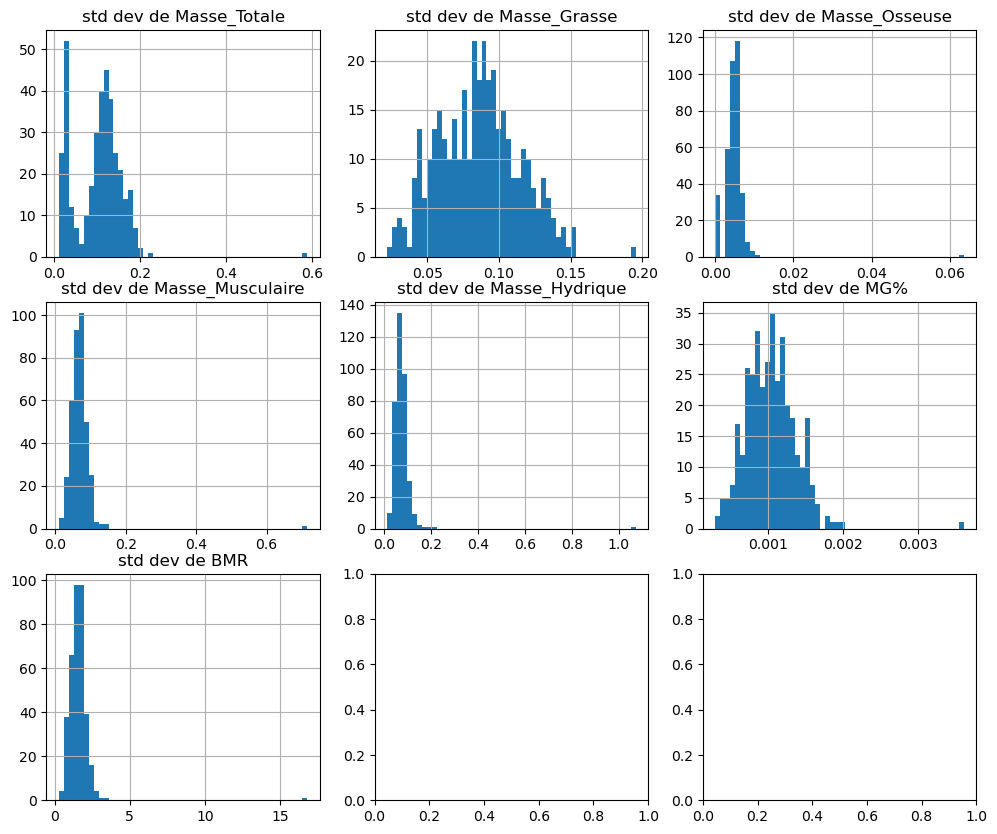

In [8]:
fig, axs = plt.subplots(nrows=len(std_empiriques.columns)//3+1, ncols=3, figsize=(12,10))
NBINS = 50

for i, name in enumerate(std_empiriques.columns):
    r = i//3
    c = i%3
    x = std_empiriques[name].to_numpy()
    axs[r,c].hist(x, bins=NBINS)
    axs[r,c].set_title(f'std dev de {name}')
    axs[r,c].grid(True)

plt.show()

In [9]:
df_weight

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR
Date,,,,,,,
2020-08-09,107.250000,37.190000,NaN,NaN,NaN,0.346760,1883.2960
2020-08-11,104.650000,33.150000,NaN,NaN,NaN,0.316770,1914.4000
2020-08-12,104.350000,33.800000,NaN,NaN,NaN,0.323910,1893.8800
2020-08-13,104.400000,34.340000,NaN,NaN,NaN,0.328927,1883.2960
2020-08-14,104.500000,33.850000,NaN,NaN,NaN,0.323923,1896.0400
...,...,...,...,...,...,...,...
2024-03-01,71.987333,11.926000,3.004000,57.042667,40.192667,0.165667,1667.3248
2024-03-02,71.781333,11.570667,3.011333,57.180000,40.412667,0.161192,1670.5504
2024-03-03,72.500000,12.039333,3.022667,57.422667,40.555333,0.166059,1675.9504


### Food

In [10]:
df_food_raw

,Date,Meal,Calories,Lipides,Glucides,Proteines
0,2020-08-03,Breakfast,621.4,27.9,69.7,22.4
1,2020-08-03,Dinner,581.6,20.4,84.5,17.1
2,2020-08-03,Lunch,656.0,41.4,26.6,33.5
3,2020-08-03,Snacks,58.0,0.0,14.0,0.0
4,2020-08-04,Breakfast,1111.6,49.0,137.8,34.3
...,...,...,...,...,...,...
3798,2024-03-02,Lunch,1179.8,23.6,87.0,158.8
3799,2024-03-03,Dinner,190.0,7.4,21.4,8.9
3800,2024-03-03,Lunch,1571.1,28.9,146.1,186.4
3801,2024-03-04,Dinner,529.6,12.1,59.0,50.8


In [11]:
df_food = df_food_raw.set_index(['Date','Meal']).unstack('Meal')

In [12]:
df_food.fillna(0, inplace=True)

In [13]:
df_food.columns = df_food.columns.to_flat_index()

In [14]:
new_names = [ name[0] + '_' + name[1] for name in df_food.columns ]
df_food.columns = new_names

In [15]:
df_food.head(10)

,Calories_Breakfast,Calories_Dinner,Calories_Lunch,Calories_Snacks,Lipides_Breakfast,Lipides_Dinner,Lipides_Lunch,Lipides_Snacks,Glucides_Breakfast,Glucides_Dinner,Glucides_Lunch,Glucides_Snacks,Proteines_Breakfast,Proteines_Dinner,Proteines_Lunch,Proteines_Snacks
Date,,,,,,,,,,,,,,,,
2020-08-03,621.4,581.6,656.0,58.0,27.9,20.4,41.4,0.0,69.7,84.5,26.6,14.0,22.4,17.1,33.5,0.0
2020-08-04,1111.6,447.4,433.7,0.0,49.0,2.1,16.6,0.0,137.8,69.1,60.6,0.0,34.3,28.5,15.6,0.0
2020-08-05,1174.2,136.7,638.0,0.0,51.6,6.7,25.8,0.0,147.1,3.2,62.8,0.0,35.7,14.8,36.4,0.0
2020-08-06,747.0,801.3,388.9,0.0,35.3,15.5,15.6,0.0,81.4,22.6,30.3,0.0,25.8,11.8,22.4,0.0
2020-08-07,791.9,397.5,484.6,0.0,35.5,7.2,24.8,0.0,91.6,75.4,1.9,0.0,27.3,7.9,60.0,0.0
2020-08-08,714.5,359.8,499.3,383.1,29.8,19.8,22.7,19.3,85.6,3.4,38.5,1.6,26.4,40.0,26.7,14.7
2020-08-09,683.1,504.7,615.5,58.0,25.0,30.8,15.5,0.0,88.3,51.2,91.5,14.0,26.7,10.6,28.8,0.0
2020-08-10,646.8,604.6,214.0,0.0,21.0,10.0,11.8,0.0,88.3,107.8,11.1,0.0,26.7,20.7,14.9,0.0
2020-08-11,557.5,413.1,801.8,0.0,12.9,21.3,16.3,0.0,83.2,43.4,59.2,0.0,26.8,10.3,67.0,0.0


### Exercices

In [16]:
df_exos_raw

,exo_duree,exo_type,exo_cals_bruts
exo_date,,,
2021-03-29,3220.826,STRENGTH_TRAINING,328.0
2021-03-30,2818.678,RUNNING,449.0
2021-03-31,3186.236,STRENGTH_TRAINING,272.0
2021-04-01,0.000,0,0.0
2021-04-02,0.000,0,0.0
...,...,...,...
2024-02-28,1440.000,INDOOR_ROWING,223.0
2024-02-29,2880.000,STRENGTH_TRAINING,373.0
2024-03-01,2280.000,WALKING,213.0


In [17]:
df_exos_raw['exo_type'].value_counts()

STRENGTH_TRAINING       521
INDOOR_ROWING           326
0                       269
WALKING                 161
RUNNING                  22
JOGGING                  21
CROSS-COUNTRY_SKIING      6
BOXING                    4
DOWNHILL_SKIING           2
ROWING                    1
SWIMMING                  1
TREADMILL_RUNNING         1
Name: exo_type, dtype: int64

In [18]:
mask = df_exos_raw['exo_type']==0

df_exos_raw = df_exos_raw[~mask]

# df_exos_raw.describe(include='all')

# df_exos_raw

In [19]:
df_exos = df_exos_raw.groupby(['exo_date', 'exo_type']).sum()

In [20]:
df_exos = df_exos.unstack('exo_type')

In [21]:
df_exos.fillna(0, inplace=True)

In [22]:
df_exos.columns = df_exos.columns.to_flat_index()

In [23]:
new_names = [ name[1] + '_' + name[0] for name in df_exos.columns ]
df_exos.columns = new_names

In [24]:
df_exos

,BOXING_exo_duree,CROSS-COUNTRY_SKIING_exo_duree,DOWNHILL_SKIING_exo_duree,INDOOR_ROWING_exo_duree,JOGGING_exo_duree,ROWING_exo_duree,RUNNING_exo_duree,STRENGTH_TRAINING_exo_duree,SWIMMING_exo_duree,TREADMILL_RUNNING_exo_duree,...,CROSS-COUNTRY_SKIING_exo_cals_bruts,DOWNHILL_SKIING_exo_cals_bruts,INDOOR_ROWING_exo_cals_bruts,JOGGING_exo_cals_bruts,ROWING_exo_cals_bruts,RUNNING_exo_cals_bruts,STRENGTH_TRAINING_exo_cals_bruts,SWIMMING_exo_cals_bruts,TREADMILL_RUNNING_exo_cals_bruts,WALKING_exo_cals_bruts
exo_date,,,,,,,,,,,,,,,,,,,,,
2021-03-29,0.0,0.0,0.0,0.0,0.000,0.0,0.000,3220.826,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,328.0,0.0,0.0,0.0
2021-03-30,0.0,0.0,0.0,0.0,0.000,0.0,2818.678,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,449.0,0.0,0.0,0.0,0.0
2021-03-31,0.0,0.0,0.0,0.0,0.000,0.0,0.000,3186.236,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,272.0,0.0,0.0,0.0
2021-04-03,0.0,0.0,0.0,0.0,0.000,0.0,0.000,3436.335,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,344.0,0.0,0.0,0.0
2021-04-04,0.0,0.0,0.0,0.0,2682.132,0.0,0.000,0.000,0.0,0.0,...,0.0,0.0,0.0,494.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28,0.0,0.0,0.0,1440.0,0.000,0.0,0.000,0.000,0.0,0.0,...,0.0,0.0,223.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-29,0.0,0.0,0.0,0.0,0.000,0.0,0.000,2880.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,373.0,0.0,0.0,0.0
2024-03-01,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0


### Dataframe complète

In [25]:
df_all = pd.concat([df_weight, df_food, df_exos], axis=1).sort_index()

In [26]:
df_all.dropna(subset=['Masse_Totale', 'Masse_Grasse'], inplace=True)
df_all['Calories_Total'] = df_all['Calories_Breakfast'] + df_all['Calories_Dinner'] + df_all['Calories_Lunch'] + df_all['Calories_Snacks']
df_all

,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories_Breakfast,Calories_Dinner,Calories_Lunch,...,DOWNHILL_SKIING_exo_cals_bruts,INDOOR_ROWING_exo_cals_bruts,JOGGING_exo_cals_bruts,ROWING_exo_cals_bruts,RUNNING_exo_cals_bruts,STRENGTH_TRAINING_exo_cals_bruts,SWIMMING_exo_cals_bruts,TREADMILL_RUNNING_exo_cals_bruts,WALKING_exo_cals_bruts,Calories_Total
2020-08-09,107.250000,37.190000,NaN,NaN,NaN,0.346760,1883.2960,683.1,504.7,615.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1861.3
2020-08-11,104.650000,33.150000,NaN,NaN,NaN,0.316770,1914.4000,557.5,413.1,801.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1772.4
2020-08-12,104.350000,33.800000,NaN,NaN,NaN,0.323910,1893.8800,690.1,563.3,640.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1894.3
2020-08-13,104.400000,34.340000,NaN,NaN,NaN,0.328927,1883.2960,723.0,541.3,558.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1822.6
2020-08-14,104.500000,33.850000,NaN,NaN,NaN,0.323923,1896.0400,723.0,637.9,530.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1891.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,71.987333,11.926000,3.004000,57.042667,40.192667,0.165667,1667.3248,10.3,355.8,1260.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,1626.2
2024-03-02,71.781333,11.570667,3.011333,57.180000,40.412667,0.161192,1670.5504,0.0,486.9,1179.8,...,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,1666.7
2024-03-03,72.500000,12.039333,3.022667,57.422667,40.555333,0.166059,1675.9504,0.0,190.0,1571.1,...,0.0,0.0,0.0,0.0,0.0,552.0,0.0,0.0,0.0,1761.1
2024-03-04,71.822000,11.679333,3.008000,57.116667,40.323333,0.162614,1669.0816,0.0,529.6,1145.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1675.1


### Construction d'une dataframe avec toutes les masses renseignées (ie depuis Mars 2023)

In [27]:
# df_all_masses est la Dataframe avec toutes les masses non NaN (depuis 2023)

df_all_masses = df_all.dropna(subset=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique'])  # drop les lignes où les masses Osseuse, Musculaire ou Hydrique sont NaN
df_all_masses.fillna(0, inplace=True)  # Met 0 dans les données d'exercice NaN
df_all_masses

/tmp/ipykernel_8534/2000915907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_masses.fillna(0, inplace=True)  # Met 0 dans les données d'exercice NaN


,Masse_Totale,Masse_Grasse,Masse_Osseuse,Masse_Musculaire,Masse_Hydrique,MG%,BMR,Calories_Breakfast,Calories_Dinner,Calories_Lunch,...,DOWNHILL_SKIING_exo_cals_bruts,INDOOR_ROWING_exo_cals_bruts,JOGGING_exo_cals_bruts,ROWING_exo_cals_bruts,RUNNING_exo_cals_bruts,STRENGTH_TRAINING_exo_cals_bruts,SWIMMING_exo_cals_bruts,TREADMILL_RUNNING_exo_cals_bruts,WALKING_exo_cals_bruts,Calories_Total
2023-03-04,70.656667,11.420000,2.961667,56.258333,39.496667,0.161627,1649.512000,0.0,1329.2,941.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2271.1
2023-03-05,71.880000,11.848571,3.000000,57.014286,40.180000,0.164837,1666.678857,0.0,644.9,1129.4,...,0.0,0.0,0.0,0.0,0.0,443.0,0.0,0.0,0.0,1774.3
2023-03-06,71.030000,10.924000,3.010000,57.082000,40.476000,0.153794,1668.289600,0.0,968.1,791.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,614.0,1759.7
2023-03-07,72.185000,11.126667,3.060000,57.986667,41.366667,0.154141,1688.860000,968.5,1212.3,335.6,...,0.0,0.0,0.0,0.0,0.0,207.0,0.0,0.0,1016.0,2516.4
2023-03-08,72.283333,10.178333,3.131667,58.956667,42.821667,0.140811,1711.468000,986.9,0.0,672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,1658.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,71.987333,11.926000,3.004000,57.042667,40.192667,0.165667,1667.324800,10.3,355.8,1260.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,1626.2
2024-03-02,71.781333,11.570667,3.011333,57.180000,40.412667,0.161192,1670.550400,0.0,486.9,1179.8,...,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,1666.7
2024-03-03,72.500000,12.039333,3.022667,57.422667,40.555333,0.166059,1675.950400,0.0,190.0,1571.1,...,0.0,0.0,0.0,0.0,0.0,552.0,0.0,0.0,0.0,1761.1
2024-03-04,71.822000,11.679333,3.008000,57.116667,40.323333,0.162614,1669.081600,0.0,529.6,1145.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1675.1


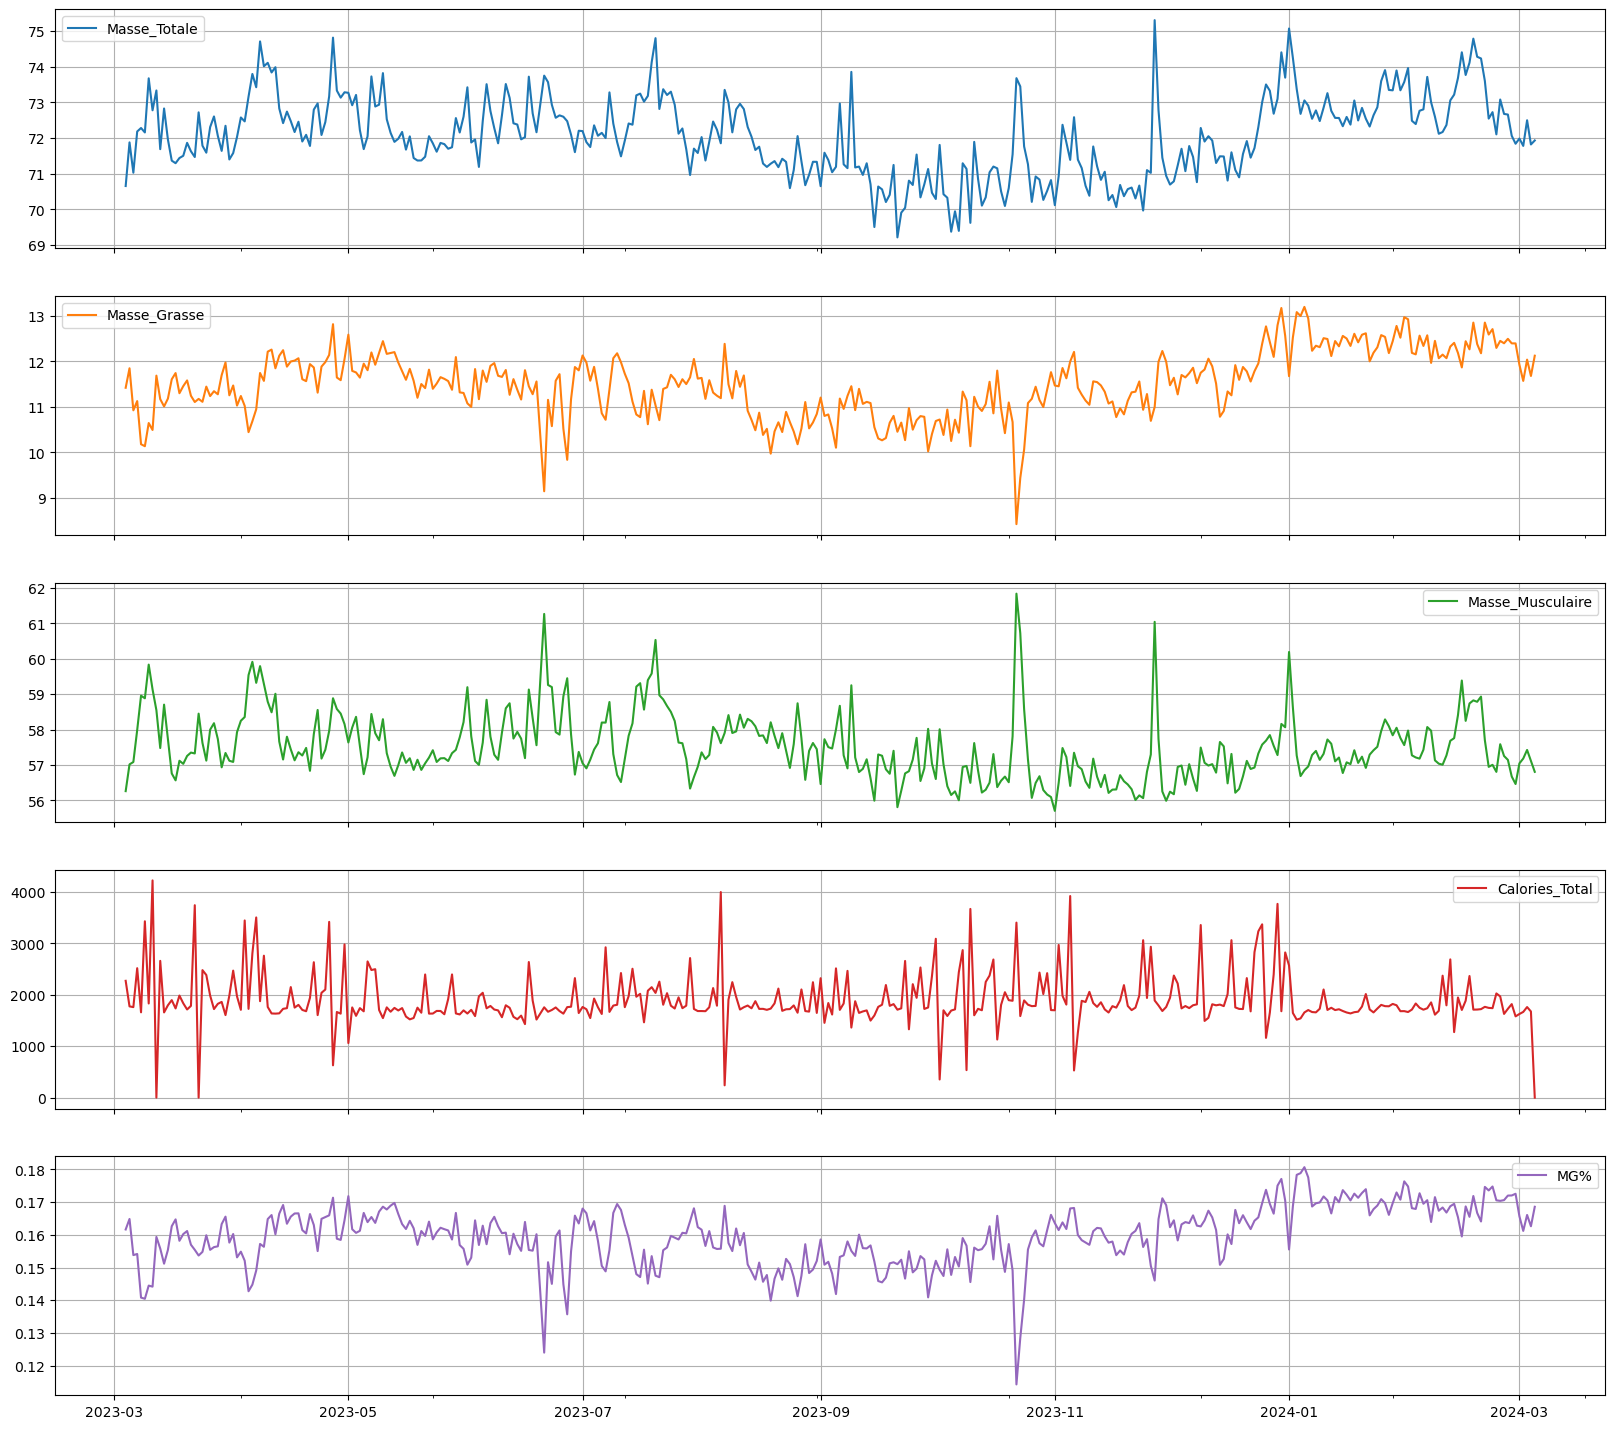

In [28]:
cols_to_display = ['Masse_Totale', 'Masse_Grasse', 'Masse_Musculaire', 'Calories_Total', 'MG%']

df_all_masses[cols_to_display].plot(subplots=True, figsize=(20,18), grid=True)
plt.show()

### Construction d'une autre dataframe avec juste masse totale et masse grasse (depuis Septembre 2020)

In [29]:
# df_mtmg_only est la dataframe avec les masses Totale et Grasse (depuis 2020)

df_mtmg_only = df_all.drop(columns=['Masse_Osseuse', 'Masse_Musculaire', 'Masse_Hydrique'])

In [30]:
df_mtmg_only.fillna(0, inplace=True)

In [31]:
# df_mtmg_only.dropna(inplace=True)
df_mtmg_only

,Masse_Totale,Masse_Grasse,MG%,BMR,Calories_Breakfast,Calories_Dinner,Calories_Lunch,Calories_Snacks,Lipides_Breakfast,Lipides_Dinner,...,DOWNHILL_SKIING_exo_cals_bruts,INDOOR_ROWING_exo_cals_bruts,JOGGING_exo_cals_bruts,ROWING_exo_cals_bruts,RUNNING_exo_cals_bruts,STRENGTH_TRAINING_exo_cals_bruts,SWIMMING_exo_cals_bruts,TREADMILL_RUNNING_exo_cals_bruts,WALKING_exo_cals_bruts,Calories_Total
2020-08-09,107.250000,37.190000,0.346760,1883.2960,683.1,504.7,615.5,58.0,25.0,30.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1861.3
2020-08-11,104.650000,33.150000,0.316770,1914.4000,557.5,413.1,801.8,0.0,12.9,21.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1772.4
2020-08-12,104.350000,33.800000,0.323910,1893.8800,690.1,563.3,640.9,0.0,25.0,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1894.3
2020-08-13,104.400000,34.340000,0.328927,1883.2960,723.0,541.3,558.3,0.0,29.0,19.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1822.6
2020-08-14,104.500000,33.850000,0.323923,1896.0400,723.0,637.9,530.6,0.0,29.0,27.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1891.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-01,71.987333,11.926000,0.165667,1667.3248,10.3,355.8,1260.1,0.0,0.2,6.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,1626.2
2024-03-02,71.781333,11.570667,0.161192,1670.5504,0.0,486.9,1179.8,0.0,0.0,18.2,...,0.0,0.0,0.0,0.0,0.0,154.0,0.0,0.0,0.0,1666.7
2024-03-03,72.500000,12.039333,0.166059,1675.9504,0.0,190.0,1571.1,0.0,0.0,7.4,...,0.0,0.0,0.0,0.0,0.0,552.0,0.0,0.0,0.0,1761.1
2024-03-04,71.822000,11.679333,0.162614,1669.0816,0.0,529.6,1145.5,0.0,0.0,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1675.1


In [32]:
df_mtmg_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1288 entries, 2020-08-09 to 2024-03-05
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Masse_Totale                         1288 non-null   float64
 1   Masse_Grasse                         1288 non-null   float64
 2   MG%                                  1288 non-null   float64
 3   BMR                                  1288 non-null   float64
 4   Calories_Breakfast                   1288 non-null   float64
 5   Calories_Dinner                      1288 non-null   float64
 6   Calories_Lunch                       1288 non-null   float64
 7   Calories_Snacks                      1288 non-null   float64
 8   Lipides_Breakfast                    1288 non-null   float64
 9   Lipides_Dinner                       1288 non-null   float64
 10  Lipides_Lunch                        1288 non-null   float64
 11  Lipides_Snacks      

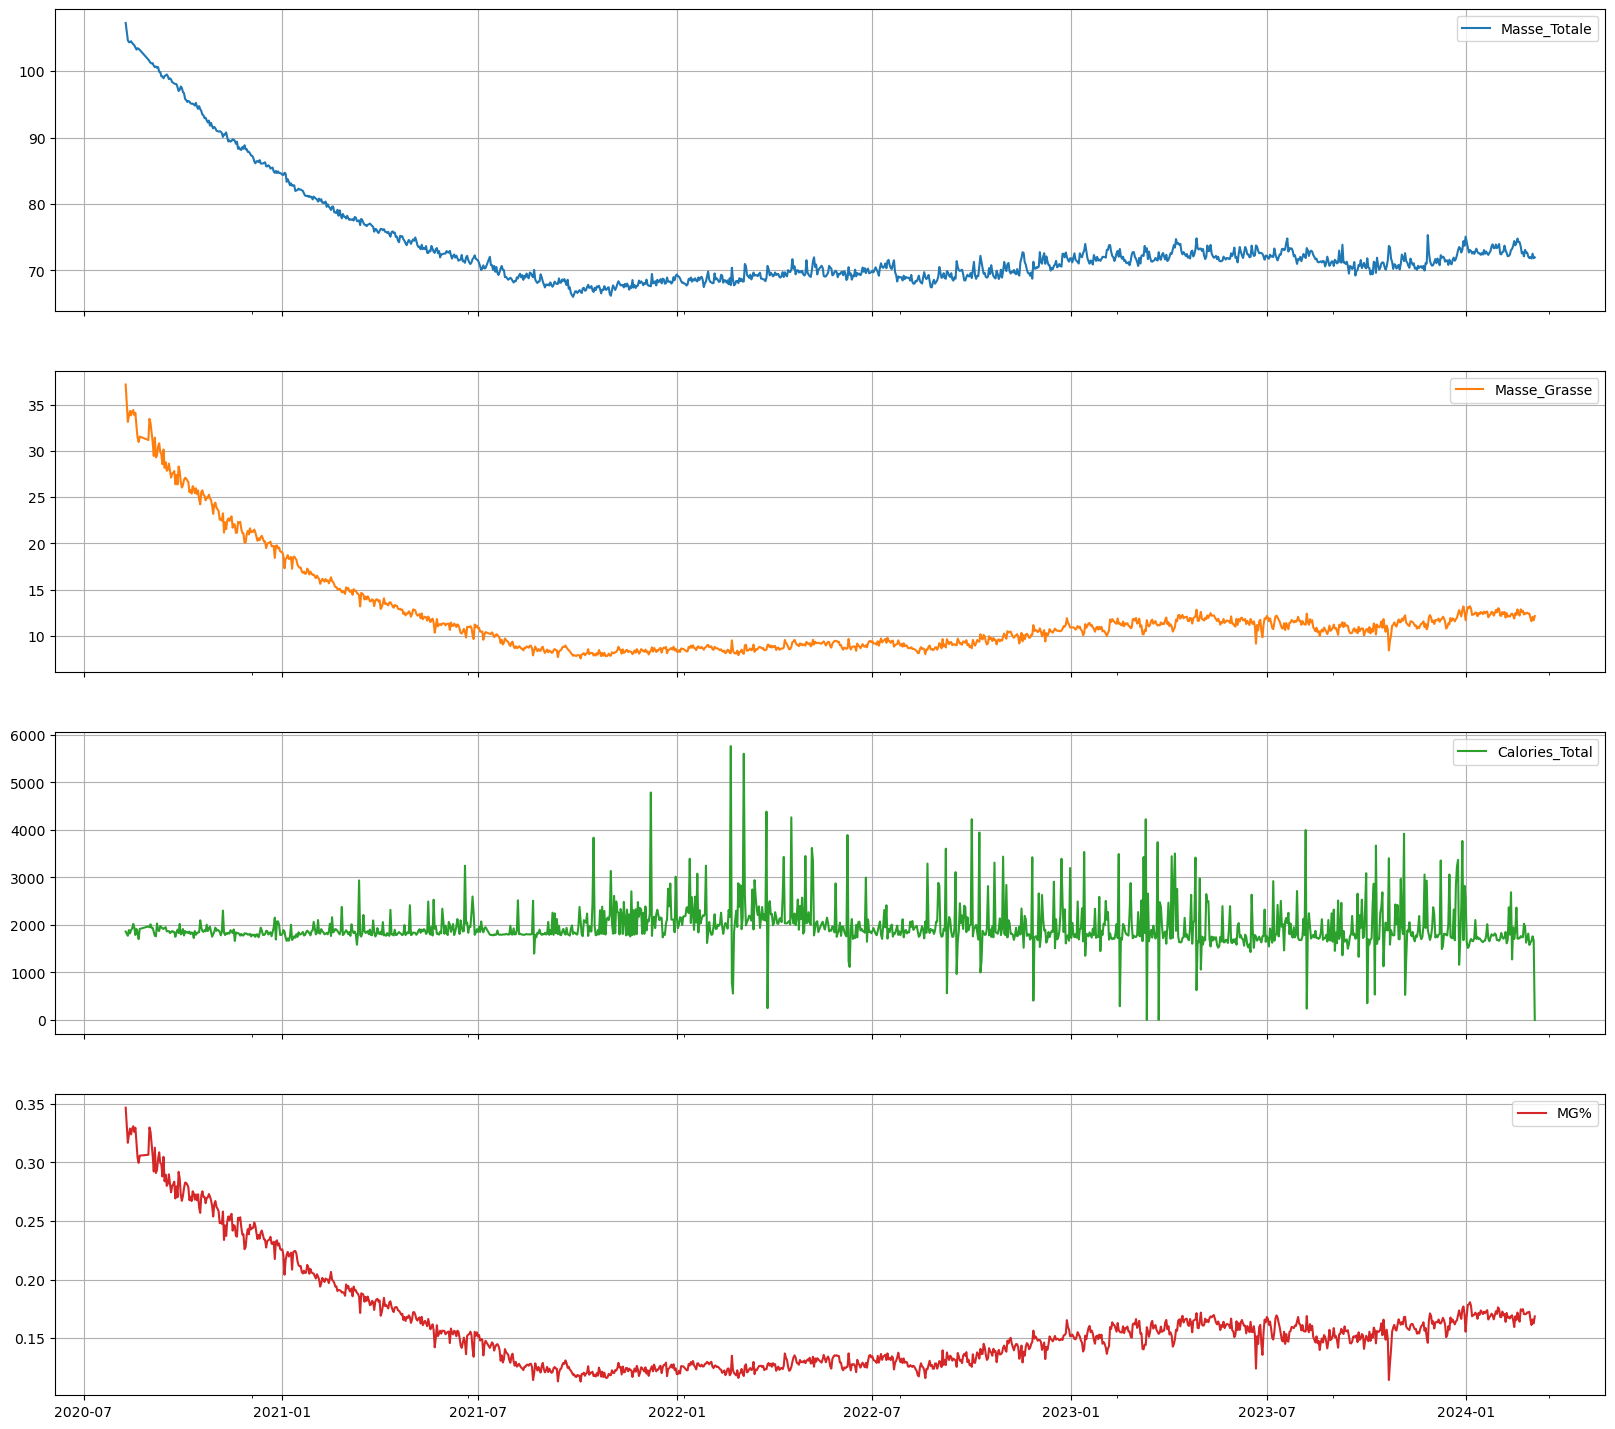

In [33]:
cols_to_display = ['Masse_Totale', 'Masse_Grasse', 'Calories_Total', 'MG%']

df_mtmg_only[cols_to_display].plot(subplots=True, figsize=(20,18), grid=True)
plt.show()

### Constitution du dataset pour training d'un premier modèle - masse totale et masse grasse seulement

In [34]:
PAST = 3 # jours dans le passé
FUTURE = 1 # nombre de jours prédiction dans le futur

L = len(df_mtmg_only)  # nombre de jours avec données MT et MG

In [35]:
df_mtmg_only.head(20)

,Masse_Totale,Masse_Grasse,MG%,BMR,Calories_Breakfast,Calories_Dinner,Calories_Lunch,Calories_Snacks,Lipides_Breakfast,Lipides_Dinner,...,DOWNHILL_SKIING_exo_cals_bruts,INDOOR_ROWING_exo_cals_bruts,JOGGING_exo_cals_bruts,ROWING_exo_cals_bruts,RUNNING_exo_cals_bruts,STRENGTH_TRAINING_exo_cals_bruts,SWIMMING_exo_cals_bruts,TREADMILL_RUNNING_exo_cals_bruts,WALKING_exo_cals_bruts,Calories_Total
2020-08-09,107.250000,37.190000,0.346760,1883.296,683.1,504.7,615.5,58.0,25.0,30.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1861.3
2020-08-11,104.650000,33.150000,0.316770,1914.400,557.5,413.1,801.8,0.0,12.9,21.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1772.4
2020-08-12,104.350000,33.800000,0.323910,1893.880,690.1,563.3,640.9,0.0,25.0,13.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1894.3
2020-08-13,104.400000,34.340000,0.328927,1883.296,723.0,541.3,558.3,0.0,29.0,19.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1822.6
2020-08-14,104.500000,33.850000,0.323923,1896.040,723.0,637.9,530.6,0.0,29.0,27.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1891.5
2020-08-15,104.250000,34.280000,0.328825,1881.352,707.3,337.1,880.9,0.0,25.0,7.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1925.3
2020-08-16,104.050000,34.430000,0.330899,1873.792,743.4,572.5,705.8,0.0,29.1,25.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.7
2020-08-17,103.900000,33.880000,0.326083,1882.432,702.6,702.8,541.1,0.0,28.9,17.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1946.5
2020-08-18,103.550000,34.130000,0.329599,1869.472,743.4,505.0,541.1,0.0,29.1,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1789.5
2020-08-19,103.250000,32.650000,0.316223,1894.960,743.4,528.1,643.3,0.0,29.1,17.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1914.8


In [36]:
columns = df_mtmg_only.columns

# data frame columns to be used as targets
Y_columns = ['Masse_Totale', 'Masse_Grasse']  

# data frame columns to be used as features
X_columns = ['Calories_Breakfast',
       'Calories_Dinner', 'Calories_Lunch', 'Calories_Snacks',
       # 'Lipides_Breakfast', 'Lipides_Dinner', 'Lipides_Lunch',
       # 'Lipides_Snacks', 'Glucides_Breakfast', 'Glucides_Dinner',
       # 'Glucides_Lunch', 'Glucides_Snacks', 'Proteines_Breakfast',
       # 'Proteines_Dinner', 'Proteines_Lunch', 'Proteines_Snacks',
       # 'BOXING_exo_duree', 'CROSS-COUNTRY_SKIING_exo_duree',
       # 'DOWNHILL_SKIING_exo_duree', 
       'INDOOR_ROWING_exo_duree',
       'JOGGING_exo_duree', 
       # 'ROWING_exo_duree', 
       'RUNNING_exo_duree',
       'STRENGTH_TRAINING_exo_duree', 
       # 'SWIMMING_exo_duree',
       # 'TREADMILL_RUNNING_exo_duree', 
       'WALKING_exo_duree',
       # 'BOXING_exo_cals_bruts', 'CROSS-COUNTRY_SKIING_exo_cals_bruts',
       # 'DOWNHILL_SKIING_exo_cals_bruts', 
       'INDOOR_ROWING_exo_cals_bruts',
       'JOGGING_exo_cals_bruts', 
       # 'ROWING_exo_cals_bruts',
       'RUNNING_exo_cals_bruts', 'STRENGTH_TRAINING_exo_cals_bruts',
       # 'SWIMMING_exo_cals_bruts', 'TREADMILL_RUNNING_exo_cals_bruts',
       'WALKING_exo_cals_bruts', 
       'Calories_Total'] 

# full_X_columns = ['Calories_Breakfast',
#        'Calories_Dinner', 'Calories_Lunch', 'Calories_Snacks',
#        'Lipides_Breakfast', 'Lipides_Dinner', 'Lipides_Lunch',
#        'Lipides_Snacks', 'Glucides_Breakfast', 'Glucides_Dinner',
#        'Glucides_Lunch', 'Glucides_Snacks', 'Proteines_Breakfast',
#        'Proteines_Dinner', 'Proteines_Lunch', 'Proteines_Snacks',
#        'BOXING_exo_duree', 'CROSS-COUNTRY_SKIING_exo_duree',
#        'DOWNHILL_SKIING_exo_duree', 'INDOOR_ROWING_exo_duree',
#        'JOGGING_exo_duree', 'ROWING_exo_duree', 'RUNNING_exo_duree',
#        'STRENGTH_TRAINING_exo_duree', 'SWIMMING_exo_duree',
#        'TREADMILL_RUNNING_exo_duree', 'WALKING_exo_duree',
#        'BOXING_exo_cals_bruts', 'C dropSTRENGTH_TRAINING_exo_cals_bruts',
#        'SWIMMING_exo_cals_bruts', 'TREADMILL_RUNNING_exo_cals_bruts',
#        'WALKING_exo_cals_bruts', 'Calories_Total'] # all features

In [37]:
class CreateDataset():
    """Create dataset for training, looking backward and forward
    """

    def __init__(
        self,
        df = None,
        past = None,
        future = None,
        target_columns = None,
        features_columns = None
    ):
        """
        Args:
            df (Dataframe, optional): Dataframe to use as souce. Defaults to df_mtmg_only.
            past (_type_, optional): number of days of past history to put in the features. Defaults to PAST.
            future (_type_, optional): numnber of days to use to create targets. Defaults to FUTURE.
            target_columns (_type_, optional): list of columns in df to use to create targets. Defaults to Y_columns. Typically mass values.
            features_columns (_type_, optional): list of columns in df to use as features. Defaults to X_columns. Typically food and exercices calories.
        """

        if df is None:
            self.df = df_mtmg_only
        else:
            self.df = df
            
        if past is None:
            self.past = PAST
        else:
            self.past = past
        
        if future is None:
            self.future = FUTURE
        else:
            self.future = future
            
        if target_columns is None:
            self.target_columns = Y_columns
        else:
            self.target_columns = target_columns
            
        if features_columns is None:
            self.features_columns = X_columns
        else:
            self.features_columns = features_columns
        
    def get_dataset(self):
        # prepare np.arrays to get features and targets
        timesteps = len(self.df) - self.future - self.past + 1 # number of time steps in total
        
        width_features_past = len(self.target_columns) + len(self.features_columns) # shape of the features block made of past mass and calories values
        widht_features_future = len(self.features_columns) # shape of the features block made of future calories values
        width_targets = len(self.target_columns) # shape of target blocks
        
        X_past = np.zeros(shape=(timesteps, self.past, width_features_past))
        X_future = np.zeros(shape=(timesteps, self.future-1, widht_features_future))
        y = np.zeros(shape=(timesteps, self.future, width_targets))
        
        # concatenate by past days and future days
        # 1/ row indexes in the dataframe df vary from 0 to len(df)-1 included
        # 2/ here, loop index J varies from PAST-1 to len(df)-1-FUTURE included
        # 3/ the block [J-PAST-1 to J] x [X_columns, Y_colums] is used as first part of features
        # 4/ the block [J+1 to J+FUTURE] x X_columns is used as second block of features
        # 5/ the block [J to J+FUTURE-1] x target_values_columns is used as target block
        
        for i, j in tqdm(enumerate(range(self.past-1, len(self.df)-self.future))):
            # print(f'i = {i}, j={j}')
            # assemble
            X_past[i] = self.df[self.target_columns + self.features_columns].iloc[j-self.past+1:j+1,:].to_numpy()
            X_future[i] = self.df[self.features_columns].iloc[j+1:j+self.future,:].to_numpy()
            y[i] = self.df[self.target_columns].iloc[j+1:j+self.future+1,:].to_numpy()
            
        return X_past, X_future, y
    
    def __repr__(self):
        representation = 'objet Create Dataset\n' + f'Dataset initial longueur {len(self.df)} jour(s)\n' + f'fenêtre PAST = {self.past} jour(s)\n' + f'fenêtre FUTURE = {self.future} jour(s)\n' 
        return representation

In [38]:
obj = CreateDataset(past=7, future=3)

print(obj)

objet Create Dataset
Dataset initial longueur 1288 jour(s)
fenêtre PAST = 7 jour(s)
fenêtre FUTURE = 3 jour(s)



In [39]:
X_past, X_future, y = obj.get_dataset()

1279it [00:18, 70.36it/s]


In [40]:
print(X_past.shape)
X_past[0]

(1279, 7, 17)


array([[ 107.25,   37.19,  683.1 ,  504.7 ,  615.5 ,   58.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1861.3 ],
       [ 104.65,   33.15,  557.5 ,  413.1 ,  801.8 ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1772.4 ],
       [ 104.35,   33.8 ,  690.1 ,  563.3 ,  640.9 ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1894.3 ],
       [ 104.4 ,   34.34,  723.  ,  541.3 ,  558.3 ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1822.6 ],
       [ 104.5 ,   33.85,  723.  ,  637.9 ,  530.6 ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1891.5 ],
       [ 104.25,   34.28,  707.3 ,  337.1 ,  880.9 ,    0.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0

In [41]:
print(X_future.shape)
X_future[0]

(1279, 2, 15)


array([[ 702.6,  702.8,  541.1,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. , 1946.5],
       [ 743.4,  505. ,  541.1,    0. ,    0. ,    0. ,    0. ,    0. ,
           0. ,    0. ,    0. ,    0. ,    0. ,    0. , 1789.5]])

In [42]:
print(y.shape)
y[0]

(1279, 3, 2)


array([[103.9 ,  33.88],
       [103.55,  34.13],
       [103.25,  32.65]])

## Prédictions J+1

In [43]:
obj = CreateDataset(past=1, future=1)

print(obj)

objet Create Dataset
Dataset initial longueur 1288 jour(s)
fenêtre PAST = 1 jour(s)
fenêtre FUTURE = 1 jour(s)



In [44]:
X_past, X_future, y = obj.get_dataset()

1287it [00:17, 75.10it/s]


In [45]:
print(f'X_past shape = {X_past.shape}')
print(f'X_future.shape = {X_future.shape}')
print(f'y shape = {y.shape}')

X_past shape = (1287, 1, 17)
X_future.shape = (1287, 0, 15)
y shape = (1287, 1, 2)


In [46]:
X_past[0]

array([[ 107.25,   37.19,  683.1 ,  504.7 ,  615.5 ,   58.  ,    0.  ,
           0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
           0.  ,    0.  , 1861.3 ]])

In [47]:
y[0]

array([[104.65,  33.15]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_past, y, test_size=0.2)

### Baseline : pred(J+1) = valeur (J)

In [49]:
y_pred = X_test[:,:,:2].squeeze()

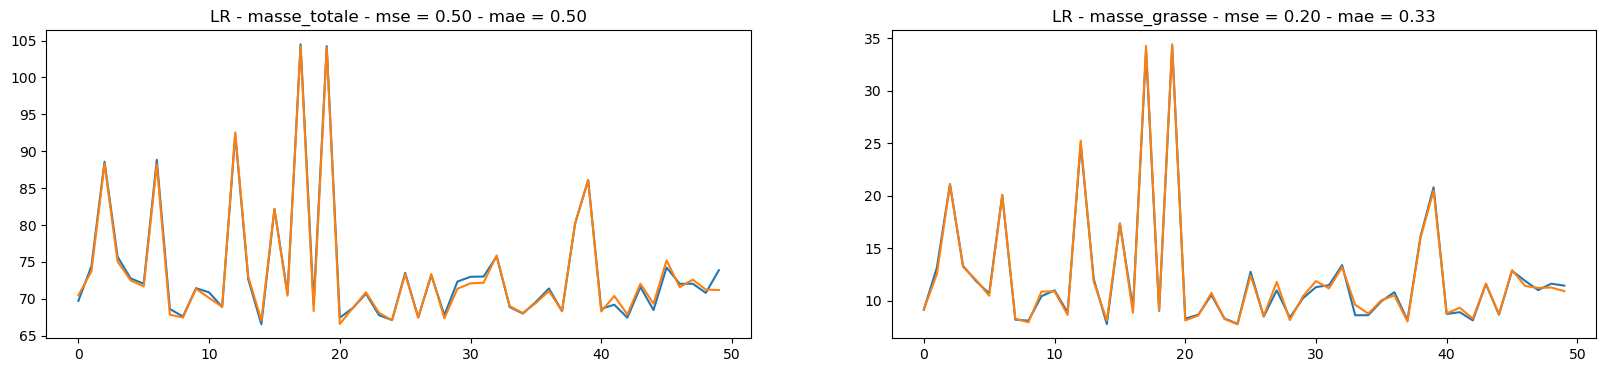

In [51]:
subset = 50

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

for i, name in enumerate(['masse_totale', 'masse_grasse']):
    ax[i].plot(y_pred[:subset,i], label='pred')
    ax[i].plot(y_test.squeeze()[:subset,i], label='ground truth')
    err_mse = mse(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    err_mae = mae(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    ax[i].set_title(f'LR - {name} - mse = {err_mse:.2f} - mae = {err_mae:.2f}')

### regression linéaire simple

In [52]:
lr = LinearRegression()
lr.fit(X_train.squeeze(), y_train.squeeze())
y_pred = lr.predict(X_test.squeeze())

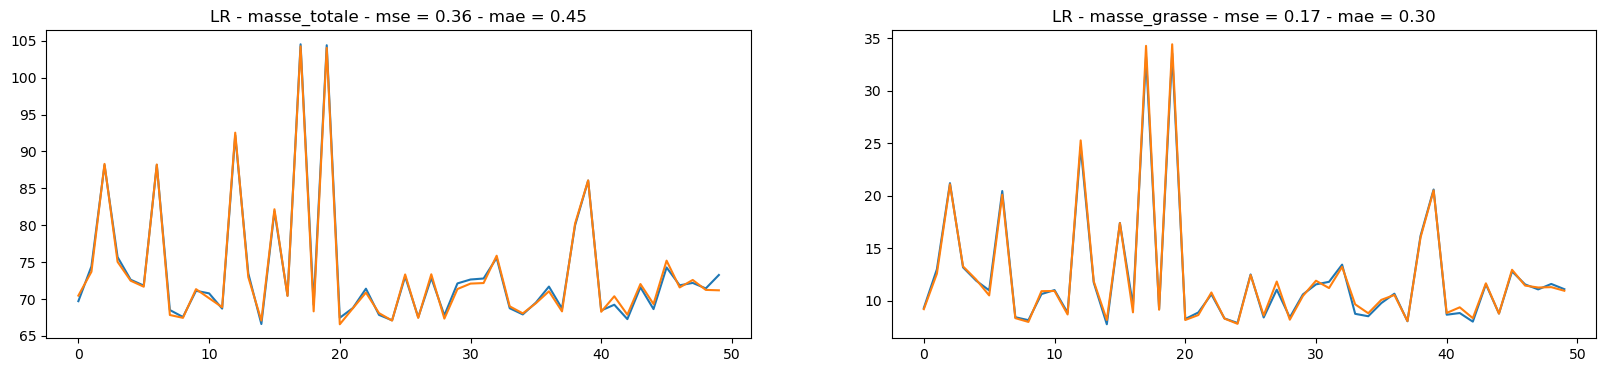

In [53]:
subset = 50

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

for i, name in enumerate(['masse_totale', 'masse_grasse']):
    ax[i].plot(y_pred[:subset,i], label='pred')
    ax[i].plot(y_test.squeeze()[:subset,i], label='ground truth')
    err_mse = mse(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    err_mae = mae(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    ax[i].set_title(f'LR - {name} - mse = {err_mse:.2f} - mae = {err_mae:.2f}')

### Prédiction J+1 avec les PAST derniers jours

In [108]:
PAST = 6

obj = CreateDataset(past=PAST, future=1)

print(obj)

objet Create Dataset
Dataset initial longueur 1288 jour(s)
fenêtre PAST = 6 jour(s)
fenêtre FUTURE = 1 jour(s)



In [109]:
X_past, X_future, y = obj.get_dataset()

print(f'X_past shape = {X_past.shape}')
print(f'X_future shape = {X_future.shape}')
print(f'y shape = {y.shape}')

16it [00:00, 74.58it/s]

1282it [00:17, 74.85it/s]

X_past shape = (1282, 6, 17)
X_future shape = (1282, 0, 15)
y shape = (1282, 1, 2)


In [110]:
X = np.reshape(X_past, newshape=(X_past.shape[0],-1))
y = y.squeeze()

print(f'X : shape = {X.shape}')
print(f'y : shape = {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X : shape = (1282, 102)
y : shape = (1282, 2)


In [111]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

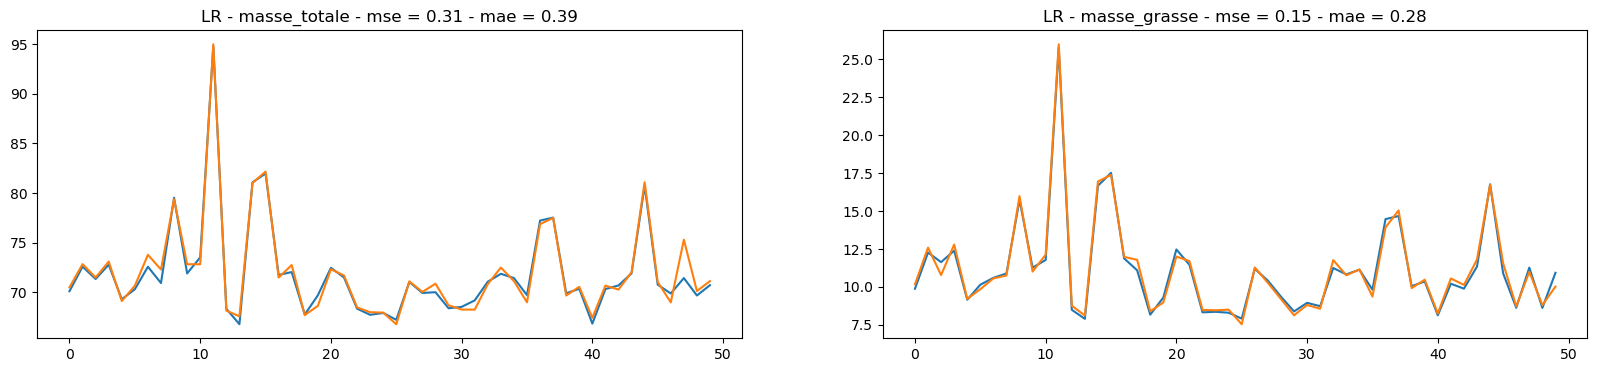

In [112]:
subset = 50

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

for i, name in enumerate(['masse_totale', 'masse_grasse']):
    ax[i].plot(y_pred[:subset,i], label='pred')
    ax[i].plot(y_test.squeeze()[:subset,i], label='ground truth')
    err_mse = mse(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    err_mae = mae(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    ax[i].set_title(f'LR - {name} - mse = {err_mse:.2f} - mae = {err_mae:.2f}')

### recherche PAST optimum

In [67]:
mse_mt = []
mse_mg = []

mae_mt = []
mae_mg = []

list_past = range(1,60)

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

In [68]:
for past in list_past:
    obj = CreateDataset(past=past, future=1)
    X_past, X_future, y = obj.get_dataset()
    X = np.reshape(X_past, newshape=(X_past.shape[0],-1))
    y = y.squeeze()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    mse_mt.append(mse(y_pred[:,0], y_test.squeeze()[:,0]).numpy())
    mse_mg.append(mse(y_pred[:,1], y_test.squeeze()[:,1]).numpy())
    mae_mt.append(mae(y_pred[:,0], y_test.squeeze()[:,0]).numpy())
    mae_mg.append(mae(y_pred[:,1], y_test.squeeze()[:,1]).numpy())

10it [00:00, 95.21it/s]

1287it [00:18, 70.35it/s]
1286it [00:13, 98.38it/s] 
1285it [00:19, 67.58it/s]
1284it [00:15, 84.32it/s] 
1283it [00:22, 56.40it/s]
1282it [00:20, 61.89it/s]
1281it [00:18, 70.45it/s]
1280it [00:18, 69.67it/s]
1279it [00:17, 71.60it/s]
1278it [00:15, 83.45it/s] 
1277it [00:16, 78.87it/s]
1276it [00:18, 68.78it/s]
1275it [00:19, 65.78it/s]
1274it [00:19, 66.11it/s]
1273it [00:19, 63.79it/s]
1272it [00:18, 68.19it/s]
1271it [00:19, 63.78it/s]
1270it [00:19, 66.41it/s]
1269it [00:17, 72.50it/s]
1268it [00:18, 67.42it/s]
1267it [00:19, 64.12it/s]
1266it [00:18, 68.82it/s]
1265it [00:19, 65.05it/s]
1264it [00:15, 81.73it/s] 
1263it [00:19, 65.94it/s]
1262it [00:19, 64.98it/s]
1261it [00:16, 75.25it/s] 
1260it [00:13, 94.35it/s] 
1259it [00:15, 83.85it/s] 
1258it [00:16, 77.74it/s]
1257it [00:16, 76.06it/s]
1256it [00:15, 79.51it/s]
1255it [00:16, 77.26it/s]
1254it [00:16, 76.78it/s] 
1253it [00:17, 72.03it/s]
1252it [00:19, 65.58it/s]
1251it [00:18, 67.24it/s]
1250it [00:18, 65.90it/s]
1249

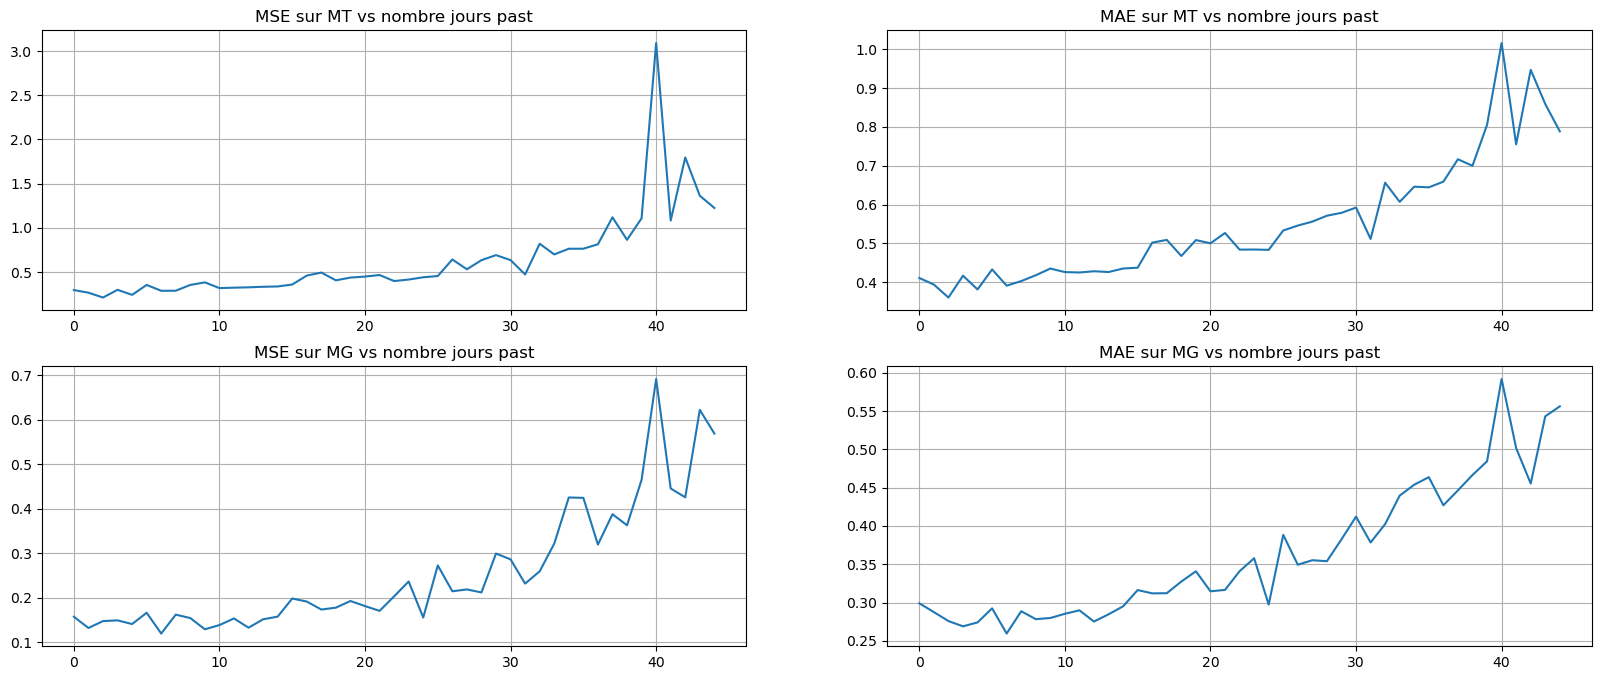

In [153]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,8))

horizon = 45

axs[0,0].plot(mse_mt[:horizon], label='MSE MT')
axs[0,0].set_title(f'MSE sur MT vs nombre jours past')
axs[0,0].grid(True)

axs[0,1].plot(mae_mt[:horizon], label='MAE MT')
axs[0,1].set_title(f'MAE sur MT vs nombre jours past')
axs[0,1].grid(True)

axs[1,0].plot(mse_mg[:horizon], label='MSE MG')
axs[1,0].set_title(f'MSE sur MG vs nombre jours past')
axs[1,0].grid(True)

axs[1,1].plot(mae_mg[:horizon], label='MAE MG')
axs[1,1].set_title(f'MAE sur MG vs nombre jours past')
axs[1,1].grid(True)

plt.show()

In [76]:
# Valeurs optimales

print(f'Nombre de jours past optimal pour MSE MT = {np.argmin(mse_mt)}')
print(f'Nombre de jours past optimal pour MAE MT = {np.argmin(mae_mt)}')
print(f'Nombre de jours past optimal pour MSE MG = {np.argmin(mse_mg)}')
print(f'Nombre de jours past optimal pour MAE MG = {np.argmin(mae_mg)}')

Nombre de jours past optimal pour MSE MT = 2
Nombre de jours past optimal pour MAE MT = 2
Nombre de jours past optimal pour MSE MG = 6
Nombre de jours past optimal pour MAE MG = 6


### Réseau MLP simple

In [115]:
PAST = 6

obj = CreateDataset(past=PAST, future=1)

In [116]:
X_past, X_future, y = obj.get_dataset()

print(f'X_past shape = {X_past.shape}')
print(f'X_future shape = {X_future.shape}')
print(f'y shape = {y.shape}')

X = np.reshape(X_past, newshape=(X_past.shape[0],-1))
y = y.squeeze()

print(f'X : shape = {X.shape}')
print(f'y : shape = {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

7it [00:00, 62.31it/s]

1282it [00:15, 84.86it/s] 

X_past shape = (1282, 6, 17)
X_future shape = (1282, 0, 15)
y shape = (1282, 1, 2)
X : shape = (1282, 102)
y : shape = (1282, 2)


In [145]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [146]:
mlp = tf.keras.models.Sequential(
    [
    tf.keras.layers.Dense(units=16, input_shape=(X.shape[1],), activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=2)]
)

In [147]:
loss = tf.keras.losses.MeanSquaredError()

mlp.compile(
    optimizer='rmsprop',
    loss=loss,
)

In [148]:
cb = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [149]:
history = mlp.fit(
    x=X_train_scaled,
    y=y_train_scaled,
    epochs=1000,
    validation_data=(X_test_scaled, y_test_scaled),
    callbacks=[cb]
)

Epoch 1/1000
33/33 [==============================] - 6s 62ms/step - loss: 0.9468 - val_loss: 0.4343
Epoch 2/1000
33/33 [==============================] - 2s 59ms/step - loss: 0.3174 - val_loss: 0.1943
Epoch 3/1000
33/33 [==============================] - 2s 56ms/step - loss: 0.1346 - val_loss: 0.1355
Epoch 4/1000
33/33 [==============================] - 2s 52ms/step - loss: 0.0804 - val_loss: 0.0988
Epoch 5/1000
33/33 [==============================] - 1s 41ms/step - loss: 0.0558 - val_loss: 0.0760
Epoch 6/1000
33/33 [==============================] - 1s 34ms/step - loss: 0.0417 - val_loss: 0.0644
Epoch 7/1000
33/33 [==============================] - 1s 45ms/step - loss: 0.0329 - val_loss: 0.0587
Epoch 8/1000
33/33 [==============================] - 2s 50ms/step - loss: 0.0280 - val_loss: 0.0527
Epoch 9/1000
33/33 [==============================] - 1s 26ms/step - loss: 0.0238 - val_loss: 0.0486
Epoch 10/1000
33/33 [==============================] - 1s 38ms/step - loss: 0.0202 - val_lo

In [150]:
    y_pred = y_scaler.inverse_transform(mlp.predict(X_test_scaled))

9/9 [==============================] - 0s 18ms/step


In [143]:
y_pred

array([[ 76.605934 ,  14.319003 ],
       [ 70.58409  ,   8.483241 ],
       [ 74.6357   ,  12.658345 ],
       [ 71.893776 ,  11.5201845],
       [ 69.92883  ,  10.181547 ],
       [ 68.308464 ,   8.666314 ],
       [ 72.4209   ,  11.767678 ],
       [ 90.104225 ,  22.794714 ],
       [ 71.00681  ,  10.068559 ],
       [ 69.6157   ,  10.007954 ],
       [ 96.42386  ,  27.08787  ],
       [ 69.7031   ,   9.099961 ],
       [ 98.281845 ,  28.357122 ],
       [ 72.54372  ,  11.657691 ],
       [ 72.36573  ,  11.170051 ],
       [ 68.104904 ,   8.528131 ],
       [ 69.67004  ,   9.1479225],
       [ 79.65091  ,  16.027449 ],
       [ 72.77772  ,  11.482946 ],
       [ 68.47397  ,   8.299471 ],
       [ 72.220566 ,  11.587711 ],
       [ 72.51889  ,  12.194725 ],
       [ 71.71866  ,  11.2751   ],
       [ 72.61766  ,  11.036599 ],
       [101.28284  ,  31.563984 ],
       [ 69.30386  ,   9.173519 ],
       [ 70.44547  ,   8.572142 ],
       [ 71.7528   ,  10.776679 ],
       [ 70.21174  ,

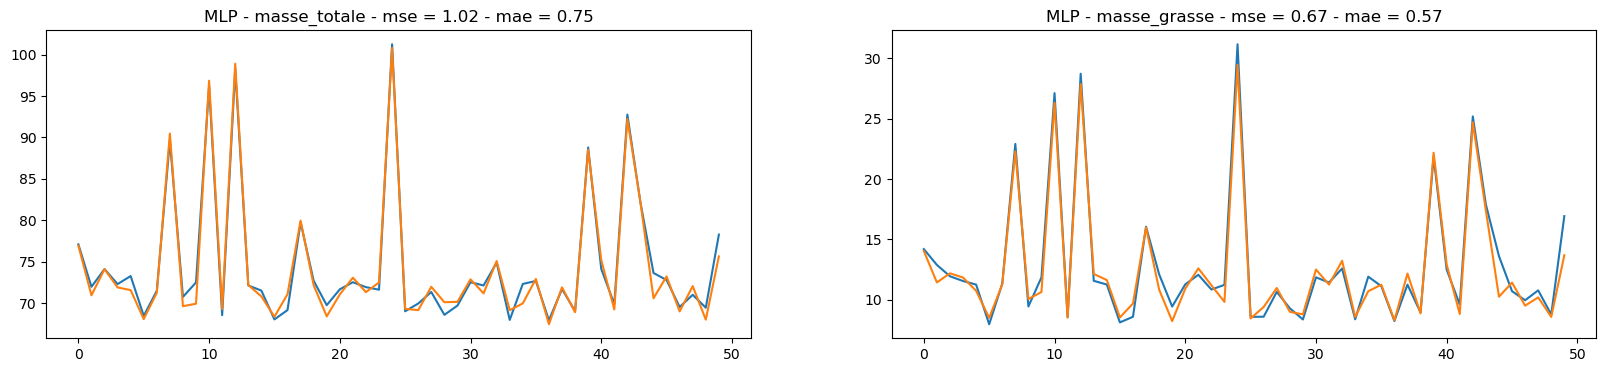

In [151]:
subset = 50

mse = tf.keras.losses.MeanSquaredError()
mae = tf.keras.losses.MeanAbsoluteError()

fig, ax  = plt.subplots(nrows=1, ncols=2, figsize=(20,4))

for i, name in enumerate(['masse_totale', 'masse_grasse']):
    ax[i].plot(y_pred[:subset,i], label='pred')
    ax[i].plot(y_test.squeeze()[:subset,i], label='ground truth')
    err_mse = mse(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    err_mae = mae(y_pred[:,i], y_test.squeeze()[:,i]).numpy()
    ax[i].set_title(f'MLP - {name} - mse = {err_mse:.2f} - mae = {err_mae:.2f}')

### Conclusion : régression linéaire meilleure que MLP...